In [28]:
import sqlite3
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import pandasql as ps
import seaborn as sns
from datetime import datetime

cnx = sqlite3.connect('C:/Users/molot/Downloads/archive/database.sqlite')
match_df=pd.read_sql_query('''SELECT l.name, m.league_id, m.season, home_team_goal, away_team_goal, (home_team_goal+away_team_goal) AS sum_team_goal
                            FROM League AS l
                            JOIN "Match" AS m ON l.id==m.league_id''', cnx).squeeze()
match_df


,name,league_id,season,home_team_goal,away_team_goal,sum_team_goal
0,Belgium Jupiler League,1,2008/2009,1,1,2
1,Belgium Jupiler League,1,2008/2009,0,0,0
2,Belgium Jupiler League,1,2008/2009,0,3,3
3,Belgium Jupiler League,1,2008/2009,5,0,5
4,Belgium Jupiler League,1,2008/2009,1,3,4
...,...,...,...,...,...,...
25974,Switzerland Super League,24558,2015/2016,1,0,1
25975,Switzerland Super League,24558,2015/2016,1,2,3
25976,Switzerland Super League,24558,2015/2016,2,0,2
25977,Switzerland Super League,24558,2015/2016,0,0,0


1. Очень часто коллеги упоминают Серию А. Может, она действительно интересная? Посмотрите, сколько там забивают суммарно голов за матч. Постройте гистограмму соответствующего данным типа. Оцените скошенность распределения визуально и подтвердите или опровергните свою гипотезу о скошенности, вычислив среднее, медиану и моду для проверки правила об их соотношении.

Среднее: 2.6168379184620485 
Мединана: 3.0 
Мода: [2]
Скошенность: 0.5855684166467635


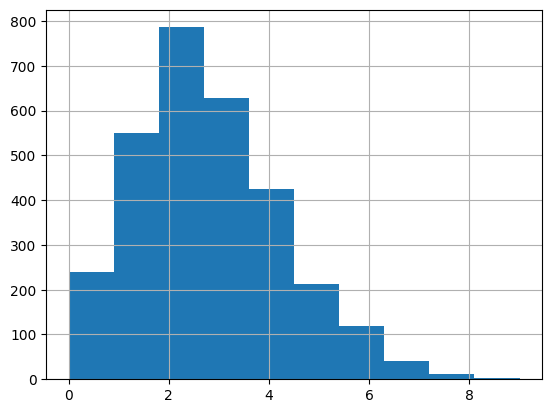

In [2]:
analyse_date=match_df.loc[(match_df['league_id']==10257)]
analyse_date['sum_team_goal'].hist(bins=10)

mean_goal=analyse_date['sum_team_goal'].mean()
moda_goal=list(match_df['sum_team_goal'].mode())
median_goal=match_df['sum_team_goal'].median()

print(f"Среднее: {mean_goal} \nМединана: {median_goal} \nМода: {moda_goal}")
print(f"Скошенность: {st.skew(match_df['sum_team_goal'])}")

### Вывод:
Визуально и программно доказано, что распределение данных о количестве забитых за матч мячей скошено влево. Среднее больше Медианы и равно моде. Хвост справа длинее, чем слева, что подтверждает скошенность влево

2. Не так уж много голов забивается в Серии А, а в каких лигах забивается в среднем голов за матч больше? Выведите их названия.

In [3]:
analyse_series_date=match_df.groupby(['league_id','name'], as_index=False).mean(['sum_team_goal']).sort_values(by='sum_team_goal', ascending=False)
analyse_series_date


,league_id,name,home_team_goal,away_team_goal,sum_team_goal
5,13274,Netherlands Eredivisie,1.779820,1.301062,3.080882
10,24558,Switzerland Super League,1.663150,1.266526,2.929677
3,7809,Germany 1. Bundesliga,1.626634,1.274918,2.901552
0,1,Belgium Jupiler League,1.609375,1.192130,2.801505
9,21518,Spain LIGA BBVA,1.631250,1.135855,2.767105
1,1729,England Premier League,1.550987,1.159539,2.710526
8,19694,Scotland Premier League,1.429276,1.204496,2.633772
4,10257,Italy Serie A,1.500829,1.116009,2.616838
7,17642,Portugal Liga ZON Sagres,1.408382,1.126218,2.534600
2,4769,France Ligue 1,1.402961,1.040132,2.443092


### Вывод
* В среднем за матч больше всего голов забивается в лиге "Netherlands Eredivisie" с 3.080882 голов. На втором месте "Switzerland Super League" с 2.929677 голов и на третьем "Germany 1. Bundesliga" с 2.901552 голов и на четвертом "Belgium Jupiler League". Bundesliga с 2.801505 голов
* Всего в 6 лигах в среднем забивалось голов больше, чем в лиге "Italy Serie A"

3. Таких лиг довольно много. Выберем самую интересную лигу и самый интересный сезон в ней.<br> Для этого посчитаем следующие показатели: <br>
a. сколько в среднем в каждом сезоне каждой лиги забивалось суммарно голов командами за матч<br>
b. сколько в среднем матчей за сезон заканчивались победой, а не ничьей.<dr>

In [4]:
analyse_season_l_date=match_df.groupby(['season','league_id','name'], as_index=False).mean()
analyse_season_l_date.sort_values('sum_team_goal', ascending=False)

,season,league_id,name,home_team_goal,away_team_goal,sum_team_goal
21,2009/2010,24558,Switzerland Super League,1.994444,1.333333,3.327778
38,2011/2012,13274,Netherlands Eredivisie,1.911765,1.346405,3.258170
27,2010/2011,13274,Netherlands Eredivisie,1.944444,1.281046,3.225490
60,2013/2014,13274,Netherlands Eredivisie,1.856209,1.339869,3.196078
58,2013/2014,7809,Germany 1. Bundesliga,1.748366,1.411765,3.160131
...,...,...,...,...,...,...
7,2008/2009,17642,Portugal Liga ZON Sagres,1.233333,1.066667,2.300000
2,2008/2009,4769,France Ligue 1,1.286842,0.971053,2.257895
17,2009/2010,15722,Poland Ekstraklasa,1.245833,0.970833,2.216667
39,2011/2012,15722,Poland Ekstraklasa,1.241667,0.954167,2.195833


In [5]:
#b
analyse_season_date=match_df.loc[match_df['away_team_goal']!=match_df['home_team_goal']].groupby(['season','name'], as_index=False).size()
g=match_df.groupby(['season','name'], as_index=False)[['sum_team_goal']].count()
result_df=pd.merge(g, analyse_season_date, on=['season','name'])
result_df['avg_victory']=result_df['sum_team_goal']/result_df['size']
result_df.sort_values(['avg_victory'], ascending=False)


,season,name,sum_team_goal,size,avg_victory
24,2010/2011,France Ligue 1,380,250,1.520000
52,2012/2013,Scotland Premier League,228,155,1.470968
70,2014/2015,Italy Serie A,379,259,1.463320
83,2015/2016,Poland Ekstraklasa,240,166,1.445783
61,2013/2014,Poland Ekstraklasa,240,167,1.437126
...,...,...,...,...,...
56,2013/2014,England Premier League,380,302,1.258278
16,2009/2010,Netherlands Eredivisie,306,244,1.254098
74,2014/2015,Scotland Premier League,228,184,1.239130
55,2013/2014,Belgium Jupiler League,12,10,1.200000


4. Для каждого из двух показателей, рассчитанных в предыдущем шаге, выведите самый зрелищный сезон среди всех сезонов всех лиг.

In [7]:
#display(new_df_slah.sort_values(by='team_goal', ascending=False))
#display(df_new.sort_values(by='victory', ascending=False))
df_group=pd.merge(analyse_season_l_date[['name','sum_team_goal','season']], result_df[['season','avg_victory']], on=['season']).sort_values(['avg_victory'], ascending=False)
display(df_group.groupby(['name','season']).mean([['sum_team_goal','avg_victory']]).sort_values(['sum_team_goal','avg_victory'], ascending=False).head(10))

sum_team_goal  avg_victory
name                     season                               
Switzerland Super League 2009/2010       3.327778     1.335221
Netherlands Eredivisie   2011/2012       3.258170     1.339775
                         2010/2011       3.225490     1.348117
                         2013/2014       3.196078     1.313397
Germany 1. Bundesliga    2013/2014       3.160131     1.313397
Netherlands Eredivisie   2012/2013       3.150327     1.357011
Switzerland Super League 2015/2016       3.144444     1.346718
Netherlands Eredivisie   2014/2015       3.078431     1.343910
Switzerland Super League 2008/2009       3.000000     1.334113
                         2010/2011       2.983333     1.348117

### Вывод
Самым зрелищным является сезон 2009/2010 по количеству побед и среднему количеству забитых голов<br>
* Самый зрелищный сезон: 2009/2010 <br>
* Самая лучшая лига: Switzerland Super League

-------------------------------------------------------------------------------------------------------------------------------------------------

5. Насколько показатели, рассчитанные в шаге 3, взаимосвязаны? Оцените их корреляцию и постройте для них диаграмму рассеивания, чтобы ответить на этот вопрос.

Text(0, 0.5, 'Среднее число матчей с победами')

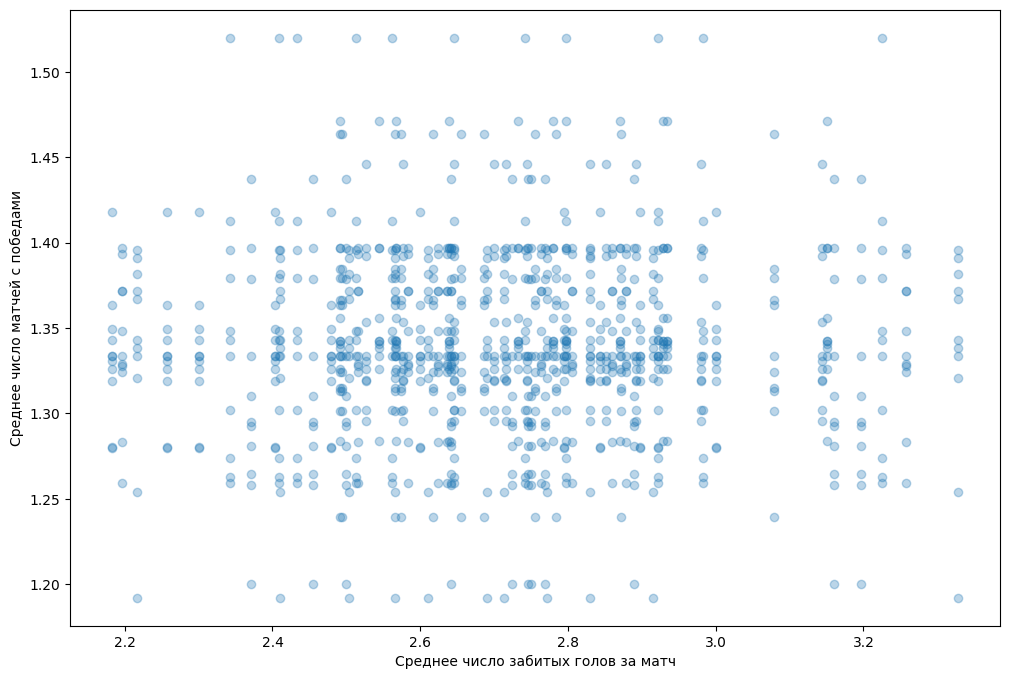

In [8]:
plt.figure(figsize=[12, 8])
plt.scatter(df_group['sum_team_goal'], df_group['avg_victory'], alpha=0.3)
plt.xlabel('Среднее число забитых голов за матч')
plt.ylabel('Среднее число матчей с победами')

Корреляция между показателями не наблюдается

6. Выберите лигу с самым интересным сезоном. Чтобы разобраться в правилах футбола и не заскучать, посмотрим именно этот сезон! 

In [40]:
interesting_leagues_sesons_df = pd.read_sql_query(
    f'''
    SELECT m.league_id, League.name, m.season, home_team.team_long_name AS comand_home, away_team.team_long_name AS comand_away, m.home_team_goal AS home_goals, 
    m.away_team_goal AS away_goals, m.date, ABS(m.home_team_goal - m.away_team_goal) AS difference
    FROM Match AS m
        JOIN League ON League.id = m.league_id
        JOIN Team AS home_team ON home_team.team_api_id = m.home_team_api_id
        JOIN Team AS away_team ON away_team.team_api_id = m.away_team_api_id
    '''
    , cnx)

mi_leagues_sesons_df = interesting_leagues_sesons_df.loc[interesting_leagues_sesons_df['difference'].idxmax()]

print(f'''Лига с самым самой болшой разницей в счете: {mi_leagues_sesons_df['name']} 
Самый с самым самой болшой разницей в счете: {mi_leagues_sesons_df['season']}
Самый зрелищный матч состоялся {mi_leagues_sesons_df['date']}
Самый зрелищный матч произошел между {mi_leagues_sesons_df['comand_home']} и { mi_leagues_sesons_df['comand_away']}
Разница в счете составила: {mi_leagues_sesons_df['difference']} голов''')

Лига с самым самой болшой разницей в счете: Netherlands Eredivisie 
Самый с самым самой болшой разницей в счете: 2010/2011
Самый зрелищный матч состоялся 2010-10-24 00:00:00
Самый зрелищный матч произошел между PSV и Feyenoord
Разница в счете составила: 10 голов


7. Интересно, а можно ли гарантировать, что в этой лиге всегда такой интересный футбол? Оцените математическое ожидание и стандартное отклонение среднего количества голов за матч с помощью имеющейся выборки. Затем постройте ящик с усами. И сделайте вывод, можно ли быть уверенным, что матчи в этой лиге всегда результативные.

C:\Users\molot\AppData\Local\Temp\ipykernel_6604\802689571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_league['sum_team_goal'] = df_best_league['home_goals'] + df_best_league['away_goals']


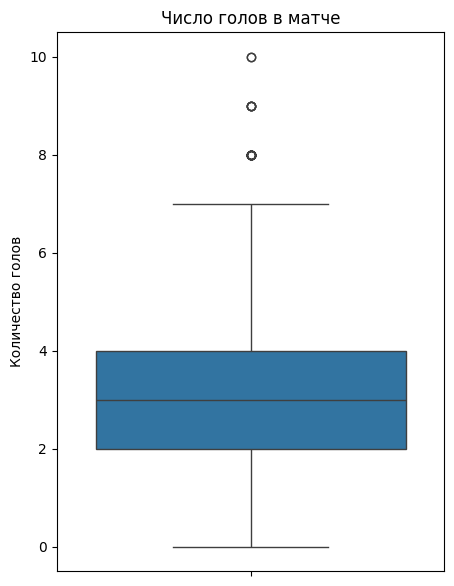

Дисперсия: 3.028588763936947
Cтандартное отклонение: 1.7402841043740378


In [71]:
df_best_league = interesting_leagues_sesons_df.loc[interesting_leagues_sesons_df['name'] == mi_leagues_sesons_df['name']]

df_best_league.reset_index(drop=True, inplace=True)
df_best_league['sum_team_goal'] = df_best_league['home_goals'] + df_best_league['away_goals']

plt.figure(figsize=(5, 7))
sns.boxplot(y=df_best_league['sum_team_goal'])
plt.title('Число голов в матче')
plt.ylabel('Количество голов')
plt.show()
print('Дисперсия:',np.var(df_best_league['sum_team_goal']))
print('Cтандартное отклонение:',np.std(df_best_league['sum_team_goal']))
